In [1]:
#import all the libraries
from modsim import *
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


dR/dt = Gamma\*Tau - Mu\*R - Beta\*R\*V

dL/dt = Rho\*Beta\*R\*V - Mu\*L - Alpha\*L

dE/dt = (1 - Rho)\*Beta\*R\*V + Alpha\*L - Delta\*E

dV/dt = Pi\*E - Sigma\*V

In [2]:
g = 1.36
t = 0.2
m = .00136
b = .00027
h = .1
a = .036
d = .33
p = 100.0
s = 2.0

R0 = 200.0
L0 = 0.0
E0 = 0.0
V0 = .0000004

dt = 0.01

0.01

In [3]:
def make_system(g, t, m, b, h, a, d, p, s):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R = R0,
                 L = L0,
                 E = E0,
                 V = V0)

    t0 = 0
    t_end = 100

    return System(gamma = g,
                  tau   = t,
                  mu    = m,
                  beta  = b,
                  rho   = h,
                  alpha = a,
                  delta = d,
                  pi    = p, 
                  sigma = s,
                  init  = init,
                  t0    = t0, 
                  t_end = t_end)


In [4]:
def plot_lymphocytes(R, L, E):
    plot(R,  label = 'Uninfected Lymphocytes')
    plot(L,   label = 'Latently Infected Lymphocytes')
    plot(E,   label = 'Infected Lymphocytes')
    decorate(xlabel = 'Time (days)',
             ylabel = 'Lymphocytes')
    
def plot_virions(V):
    plot(V, '--', label = 'Free Virions')
    decorate(xlabel = 'Time (days)',
             ylabel = 'Virions')

In [5]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [6]:
def update(state, t, system):
    unpack(system)
    r, l, e, v = state
    
    for T in range (int(1/dt)):
        
        dR = (gamma*tau - mu*r - beta*r*v)*dt

        dL = (rho*beta*r*v - mu*l - alpha*l)*dt

        dE = ((1 - rho)*beta*r*v + alpha*l - delta*e)*dt

        dV = (pi*e - sigma*v)*dt
    
        r += dR
        l += dL
        e += dE
        v += dV
    
    return State(R=r, L=l, E=e, V=v)

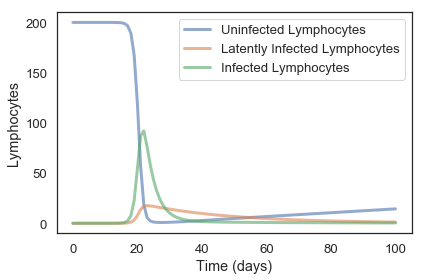

In [7]:
sys = make_system(g, t, m, b, h, a, d, p, s)
results = run_simulation(sys, update)
plot_lymphocytes(results.R, results.L, results.E)

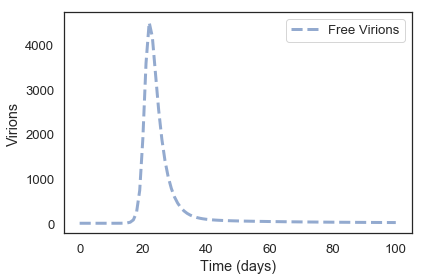

In [8]:
plot_virions(results.V)#large number ruins other plots so plotted seperately)